In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
data = pd.DataFrame(ground_cricket_data)
data.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
#renaming the columns and head displays the first five data
data.rename(columns = {'Chirps/Second': 'Seconds', 'Ground Temperature': 'Ground_temp'}, inplace = True)
data.head()

,Seconds,Ground_temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


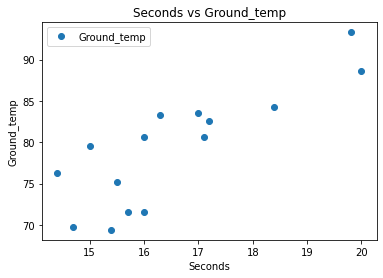

In [ ]:
#plotting the graph and checking for the linearity
data.plot(x='Seconds', y='Ground_temp', style='o')
plt.title('Seconds vs Ground_temp')
plt.xlabel('Seconds')
plt.ylabel('Ground_temp')
plt.show()

In [ ]:
#dividing the given data into the target and the independent vaiables "Ground_temp" column to X and "Seconds" as target variable i,e Y
#to frame convert the Series into the dataframe
X = data["Ground_temp"]
X = X.to_frame()
Y = data["Seconds"]

In [ ]:
#initialise my Linear Regression Predicted ground temperature = m * Seconds + c
Cricket_linreg = linear_model.LinearRegression()#initialize the linearregressoon model to the variable Cricket_linreg
Cricket_linreg.fit(X, Y)

LinearRegression()

In [ ]:
#Finding the intercept and the coeffient for the equation
print('intercept:', Cricket_linreg.intercept_)
print('coefficient:', Cricket_linreg.coef_)

intercept: 0.45931464523595267
coefficient: [0.20299973]


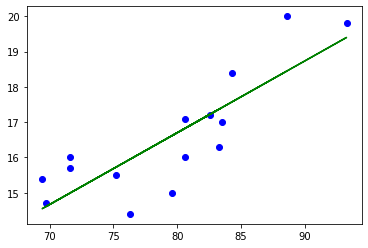

In [ ]:
#plotting the original data and the equation on the chart
plt.scatter(X, Y, color='blue')
plt.plot(X, Cricket_linreg.predict(X), color='green')


In [ ]:
#Finding the R square score to determine the the equation is good fit for this data
print('r-squared: ', Cricket_linreg.score(X, Y))

r-squared:  0.6922946529146998


In [ ]:
#Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping
Cricket_linreg.predict([[95]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([19.74428913])

In [ ]:
#Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. 
#What was the approximate ground temperature that morning?
(18 - Cricket_linreg.intercept_) / Cricket_linreg.coef_

array([86.40743135])